**Author: ZHONG, Ziyu**

# Problem 1: PCA experiments

## (a) Set up data matrix

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = np.array(pd.read_csv('train.5'),dtype='float32').T
X.shape

(256, 555)

Show a reshaped image

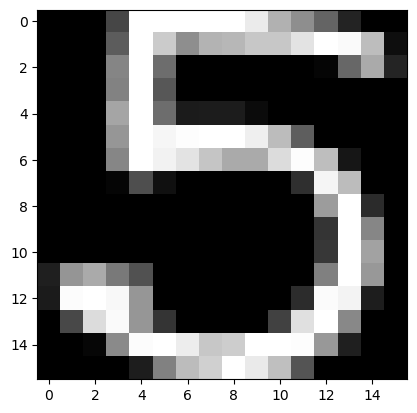

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
img1 = np.reshape(X[:,1],(16,16))
imgshow = plt.imshow(img1,cmap='gray')

## (b) Compute the sample mean

In [4]:
mu = np.mean(X, axis=1)
mu = np.reshape(mu,(256,1))
X_bias = X - mu

## (c) SVD

In [5]:
U,sigma,VT = np.linalg.svd(X_bias)

Set k = 50

In [6]:
k = 50
sigma_k = np.copy(sigma)
sigma_k[k:] = 0
lmd_k = np.square(sigma_k)

## (d) Plot the eigenvalue curve

Text(0, 0.5, 'explained_variance_ratio')

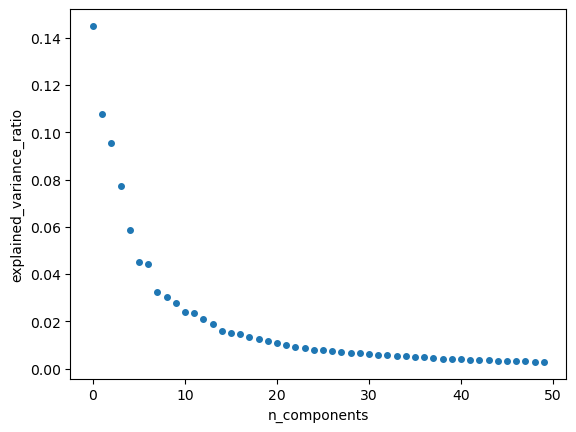

In [7]:
lmd_percentage = lmd_k[:k]/np.sum(lmd_k[:k])
plt.plot(lmd_percentage, "o", markersize=4)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')

## (e) Visualize the mean and top-k principle components

### Show the mean

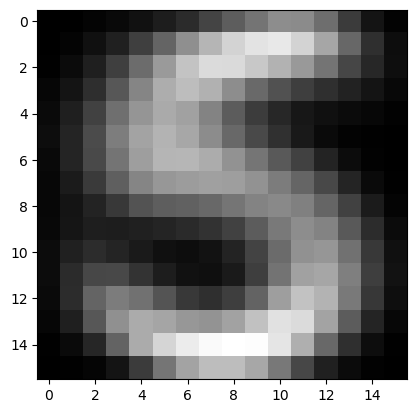

In [8]:
img_mu = np.reshape(mu,(16,16))
imgshow = plt.imshow(img_mu,cmap='gray')

### Show the top-k principle components (show top 25 here)

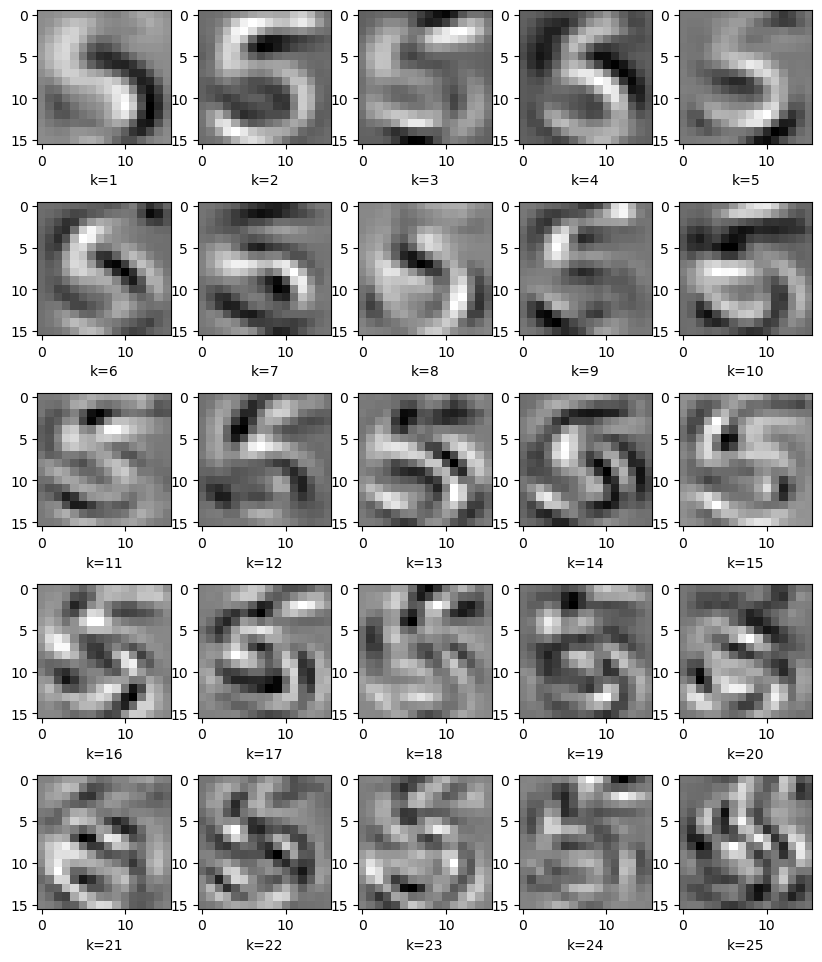

In [9]:
plt.figure(figsize=(10, 12), dpi=100)
for i in range(25):
    img_u = np.reshape(U[:,i],(16,16))
    plt.subplot(5,5,i+1)
    plt.imshow(img_u,cmap='gray')
    plt.xlabel(f'k={i+1}')

## (f) For $k = 1$, Order the images according to the top first right singular vector $v_1$ in an ascending order

In [10]:
idx = np.argsort(VT[0,:])

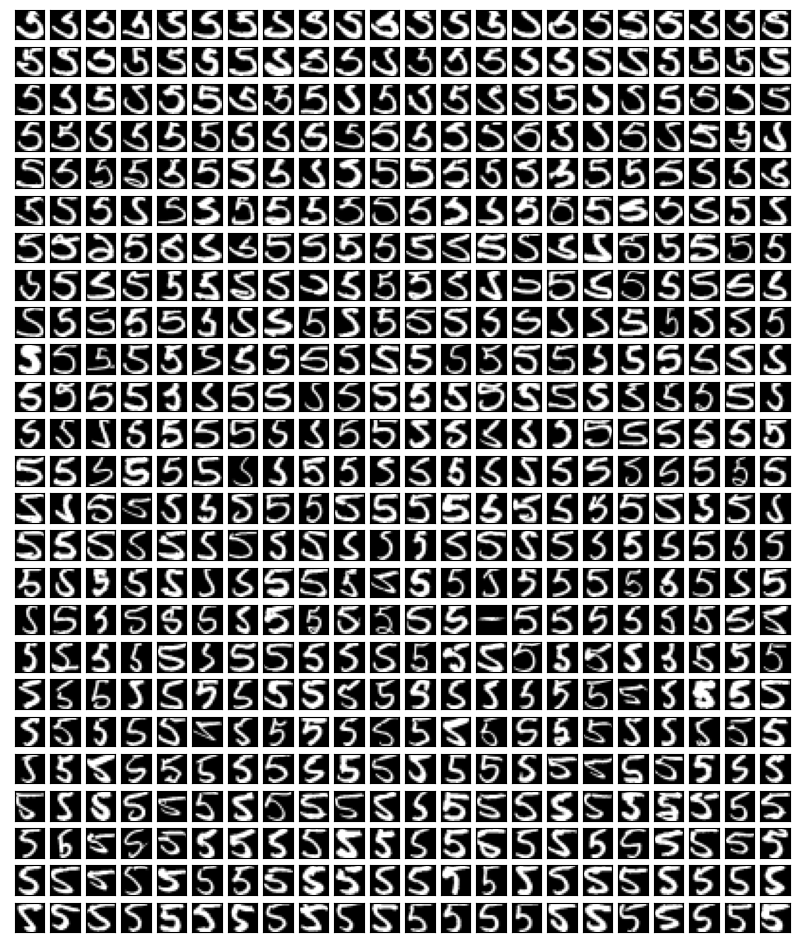

In [11]:
plt.figure(figsize=(10, 12), dpi=100)
for i in range(550):
    img = np.reshape(X[:,idx[i]],(16,16))
    plt.subplot(25,22,i+1)
    plt.imshow(img,cmap='gray')
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

## (g) For $k = 2$, scatter plot $(v1, v2)$ and select a grid on such a plane to show those images

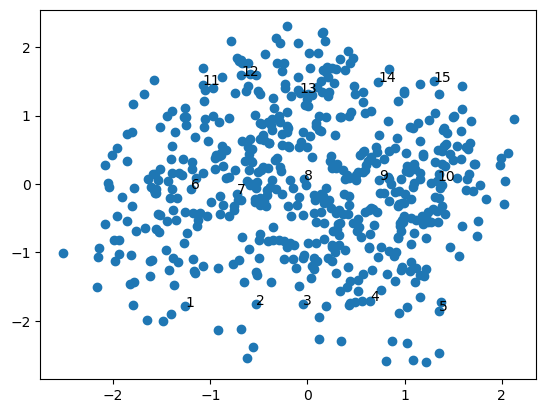

In [12]:
x = VT[0,:]
y = VT[1,:]
norm_x = (x-np.mean(x))/np.std(x)
norm_y = (y-np.mean(y))/np.std(y)
plt.scatter(norm_x, norm_y, marker='o')
idx_show = idx[[75,168,255,392,504, 81,133,258,406,501, 93,140,252,404,496]]
n_sample = len(idx_show)
for i in range(n_sample):
    plt.annotate(f'{i+1}', xy = (norm_x[idx_show[i]], norm_y[idx_show[i]]), xytext = (norm_x[idx_show[i]], norm_y[idx_show[i]]))

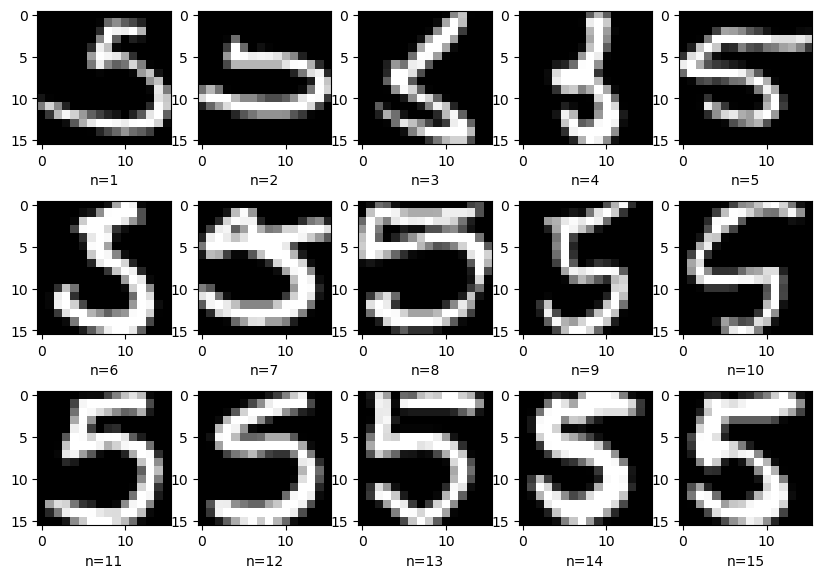

In [13]:
plt.figure(figsize=(10, 7), dpi=100)
for i in range(n_sample):
    img = np.reshape(X[:,idx_show[i]],(16,16))
    plt.subplot(3,5,i+1)
    plt.imshow(img,cmap='gray')
    plt.xlabel(f'n={i+1}')

## (h) Parallel analysis with permutation test

In [14]:
R = 500
pvals = np.zeros(256,dtype='float32')
X_r = X_bias[:,:]
for _ in range(R):
    for i in range(256):
        np.random.shuffle(X_r[i])
    sigma_r = np.linalg.svd(X_bias)[1]
    pvals = pvals + (sigma_r > sigma)
pvals = pvals/R

Show the p-values:

In [15]:
pvals

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.466, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ,

Count the number of PCs whose pvals < 0.5:

In [16]:
np.sum(pvals<0.05)

20